# Simple Implementation of [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset


In [843]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime 
import os


dataLen = 150

# Create a Sirectory to save weithgs and an plots [resource](https://stackoverflow.com/questions/1274405/how-to-create-new-folder)

In [844]:
def creatDirectory(path, params):
    '''
    creates a new directory to save figures and scores with input params a dictionary
    '''
    direc = f"{datetime.datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}_epoch={params['epochs']}_lr={params['lr']}/"
    if not os.path.exists(path + direc):
        os.makedirs(path + direc)

    return path + direc



In [845]:
def saveParams(path, params):
    fileName = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}.txt"
    f = open(path+fileName, "w")
    
    for key in params.keys(): 
        f.write(f"{key}={params[key]}\n")
    f.close()
    
def saveWeights(path, weights, params):
    name = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}.npz"
    for x in weights:
        np.save(path+name, x)

# test
# epochs = 100
# lr = .3
# params = {'epochs': epochs, 'lr': lr}
# newDirec = creatDirectory(f"./train-dryBean/", params)
# saveParams(newDirec, params)
# saveWeights(newDirec,weights, params)

# Loading Data

In [846]:
def loadData(fileName, dataLen):
    """
    loads a file.data into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



    file = open(fileName, 'rb')
    data = [row.decode('utf-8').split(',') for row in file]
    file.close()

    data= data[:dataLen]

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1][:-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadData('iris-data/iris.data', dataLen)


# Normalize the data

mean:  [5.84333333 3.054      3.75866667 1.19866667]
std:  [0.82530129 0.43214658 1.75852918 0.76061262]


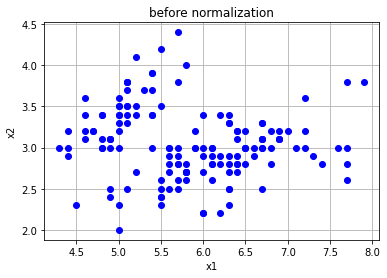

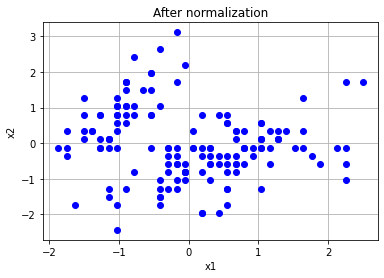

In [847]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [848]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
dataSetOutput =generateOuput(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], dataSetClass)
    

# Adding Bias

In [849]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [850]:
# split into train and test
rand = np.random.rand(150) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(72, 5)
(78, 5)
(72, 3)
(78, 3)


# Activation Functions

In [851]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (5, 10)


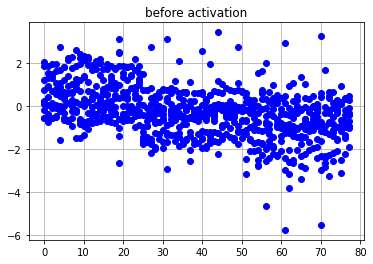

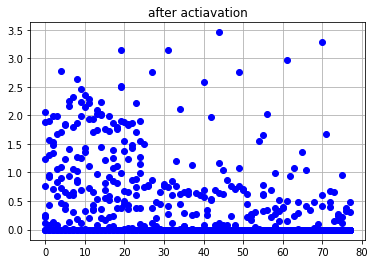

W.shape= (10, 3)


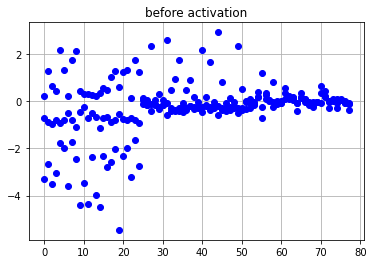

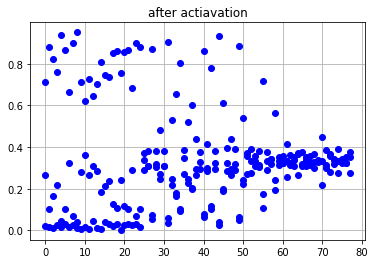

In [852]:
#init weights 
hiddenLayerSizes = [10, 3]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [853]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [854]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
# outputFlow_list = forward(dataSetInput)
# for i in range(len(outputFlow_list)): 
#     print("flow[", i, ']=', outputFlow_list[i][:1])
#     print("flow[", i, ']=', outputFlow_list[i].shape)

# BackPropagation

In [855]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [856]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [857]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [858]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        outputFlow_list = forward(dataSetTestInput)
        #evaluationg score
        score = test(dataSetTestOutput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

Epoch:  0 , Loss= 3.5551796572373178 , Score= 0.125
Epoch:  1 , Loss= 2.1768076147934967 , Score= 0.5555555555555556
Epoch:  2 , Loss= 1.6695803473694786 , Score= 0.5972222222222222
Epoch:  3 , Loss= 1.4598984441165783 , Score= 0.6388888888888888
Epoch:  4 , Loss= 1.3433906570061032 , Score= 0.7222222222222222
Epoch:  5 , Loss= 1.250112958232068 , Score= 0.7083333333333334
Epoch:  6 , Loss= 1.1687107563113817 , Score= 0.6944444444444444
Epoch:  7 , Loss= 1.094158653602984 , Score= 0.7222222222222222
Epoch:  8 , Loss= 1.028080165806202 , Score= 0.7361111111111112
Epoch:  9 , Loss= 0.9712179715927861 , Score= 0.7361111111111112
Epoch:  10 , Loss= 0.9224228796511222 , Score= 0.7361111111111112
Epoch:  11 , Loss= 0.8808747850428787 , Score= 0.7222222222222222
Epoch:  12 , Loss= 0.8463821824753043 , Score= 0.7222222222222222
Epoch:  13 , Loss= 0.8170882944969358 , Score= 0.7222222222222222
Epoch:  14 , Loss= 0.7913492146517438 , Score= 0.7222222222222222
Epoch:  15 , Loss= 0.768838085513344

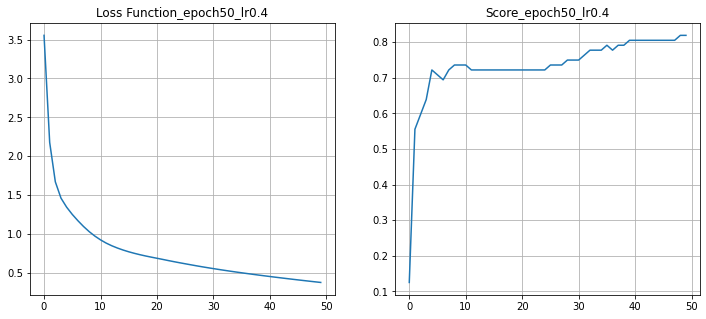

Epoch:  0 , Loss= 0.3663125648481912 , Score= 0.8194444444444444
Epoch:  1 , Loss= 0.3624636663461564 , Score= 0.8194444444444444
Epoch:  2 , Loss= 0.35864237493295426 , Score= 0.8194444444444444
Epoch:  3 , Loss= 0.3548486542566546 , Score= 0.8194444444444444
Epoch:  4 , Loss= 0.3510826712534507 , Score= 0.8194444444444444
Epoch:  5 , Loss= 0.34734616199592694 , Score= 0.8194444444444444
Epoch:  6 , Loss= 0.34363738797536214 , Score= 0.8333333333333334
Epoch:  7 , Loss= 0.3399564433105465 , Score= 0.8333333333333334
Epoch:  8 , Loss= 0.33630345486001373 , Score= 0.8333333333333334
Epoch:  9 , Loss= 0.3327200912407853 , Score= 0.8333333333333334
Epoch:  10 , Loss= 0.3291923421391444 , Score= 0.8333333333333334
Epoch:  11 , Loss= 0.32569711907988447 , Score= 0.8333333333333334
Epoch:  12 , Loss= 0.3222331574382628 , Score= 0.8472222222222222
Epoch:  13 , Loss= 0.31880410466710574 , Score= 0.8472222222222222
Epoch:  14 , Loss= 0.31541466138611984 , Score= 0.8472222222222222
Epoch:  15 , 

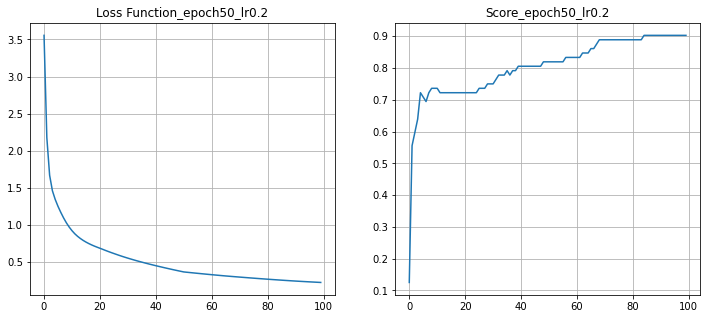

Epoch:  0 , Loss= 0.22276080744109722 , Score= 0.9027777777777778
Epoch:  1 , Loss= 0.221828655828556 , Score= 0.9027777777777778
Epoch:  2 , Loss= 0.2209040562502468 , Score= 0.9027777777777778
Epoch:  3 , Loss= 0.21998695797753118 , Score= 0.9027777777777778
Epoch:  4 , Loss= 0.21907731013974138 , Score= 0.9027777777777778
Epoch:  5 , Loss= 0.21817506171958584 , Score= 0.9027777777777778
Epoch:  6 , Loss= 0.21728016155165364 , Score= 0.9027777777777778
Epoch:  7 , Loss= 0.216392558323522 , Score= 0.9027777777777778
Epoch:  8 , Loss= 0.21551220057904488 , Score= 0.9166666666666666
Epoch:  9 , Loss= 0.2146390367234699 , Score= 0.9166666666666666
Epoch:  10 , Loss= 0.21377301503007873 , Score= 0.9166666666666666
Epoch:  11 , Loss= 0.21291466201718054 , Score= 0.9166666666666666
Epoch:  12 , Loss= 0.21206719397214654 , Score= 0.9166666666666666
Epoch:  13 , Loss= 0.21123765390286373 , Score= 0.9166666666666666
Epoch:  14 , Loss= 0.21041493757472085 , Score= 0.9166666666666666
Epoch:  15 

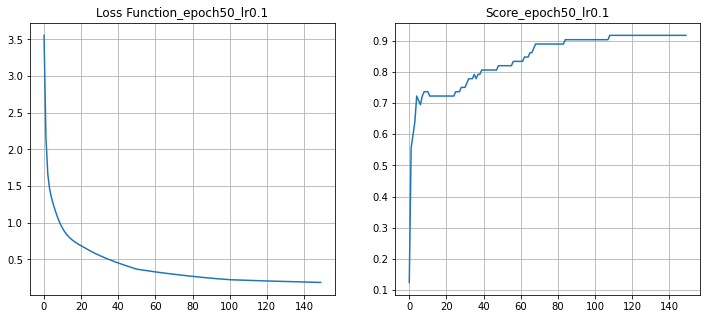

Epoch:  0 , Loss= 0.18492037654483448 , Score= 0.9166666666666666
Epoch:  1 , Loss= 0.1843062339326498 , Score= 0.9166666666666666
Epoch:  2 , Loss= 0.18369898994459413 , Score= 0.9166666666666666
Epoch:  3 , Loss= 0.18309821863561762 , Score= 0.9166666666666666
Epoch:  4 , Loss= 0.1824991286567195 , Score= 0.9166666666666666
Epoch:  5 , Loss= 0.18190596929150135 , Score= 0.9166666666666666
Epoch:  6 , Loss= 0.18132065269755376 , Score= 0.9166666666666666
Epoch:  7 , Loss= 0.18073708873635666 , Score= 0.9166666666666666
Epoch:  8 , Loss= 0.18015888770811744 , Score= 0.9166666666666666
Epoch:  9 , Loss= 0.17958885567308536 , Score= 0.9166666666666666
Epoch:  10 , Loss= 0.17901904423332285 , Score= 0.9166666666666666
Epoch:  11 , Loss= 0.1784542607995883 , Score= 0.9166666666666666
Epoch:  12 , Loss= 0.17789786964014934 , Score= 0.9166666666666666
Epoch:  13 , Loss= 0.1773413105798329 , Score= 0.9166666666666666
Epoch:  14 , Loss= 0.17678965646478872 , Score= 0.9166666666666666
Epoch:  1

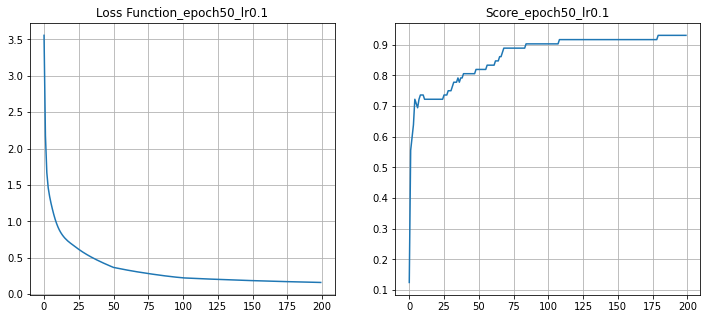

Epoch:  0 , Loss= 0.15959558219223857 , Score= 0.9305555555555556
Epoch:  1 , Loss= 0.1591822560493547 , Score= 0.9305555555555556
Epoch:  2 , Loss= 0.15876885494495427 , Score= 0.9305555555555556
Epoch:  3 , Loss= 0.15836362763054207 , Score= 0.9305555555555556
Epoch:  4 , Loss= 0.15795535980746925 , Score= 0.9305555555555556
Epoch:  5 , Loss= 0.15755217999266147 , Score= 0.9305555555555556
Epoch:  6 , Loss= 0.15715232461119236 , Score= 0.9305555555555556
Epoch:  7 , Loss= 0.15675169422167656 , Score= 0.9305555555555556
Epoch:  8 , Loss= 0.15635858453925403 , Score= 0.9305555555555556
Epoch:  9 , Loss= 0.1559636971357803 , Score= 0.9305555555555556
Epoch:  10 , Loss= 0.15557296478591204 , Score= 0.9305555555555556
Epoch:  11 , Loss= 0.15518546214174386 , Score= 0.9305555555555556
Epoch:  12 , Loss= 0.15479705063557228 , Score= 0.9305555555555556
Epoch:  13 , Loss= 0.15441675859639808 , Score= 0.9305555555555556
Epoch:  14 , Loss= 0.15403294739446688 , Score= 0.9305555555555556
Epoch: 

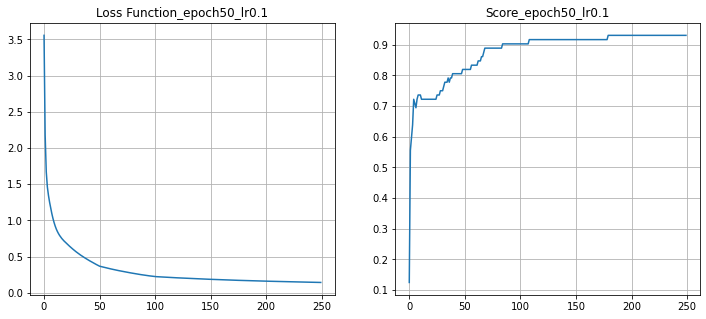

Epoch:  0 , Loss= 0.14159713964773218 , Score= 0.9305555555555556
Epoch:  1 , Loss= 0.14143773722499425 , Score= 0.9305555555555556
Epoch:  2 , Loss= 0.14127949430309483 , Score= 0.9305555555555556
Epoch:  3 , Loss= 0.14112164038852223 , Score= 0.9305555555555556
Epoch:  4 , Loss= 0.1409635832936619 , Score= 0.9305555555555556
Epoch:  5 , Loss= 0.14080869270711865 , Score= 0.9305555555555556
Epoch:  6 , Loss= 0.1406536980038513 , Score= 0.9305555555555556
Epoch:  7 , Loss= 0.14049888039014705 , Score= 0.9305555555555556
Epoch:  8 , Loss= 0.14034157532756864 , Score= 0.9305555555555556
Epoch:  9 , Loss= 0.14019007923473004 , Score= 0.9305555555555556
Epoch:  10 , Loss= 0.14003582469960058 , Score= 0.9305555555555556
Epoch:  11 , Loss= 0.13988174759251537 , Score= 0.9305555555555556
Epoch:  12 , Loss= 0.13972731742271977 , Score= 0.9305555555555556
Epoch:  13 , Loss= 0.1395780339643933 , Score= 0.9305555555555556
Epoch:  14 , Loss= 0.1394249776259896 , Score= 0.9305555555555556
Epoch:  1

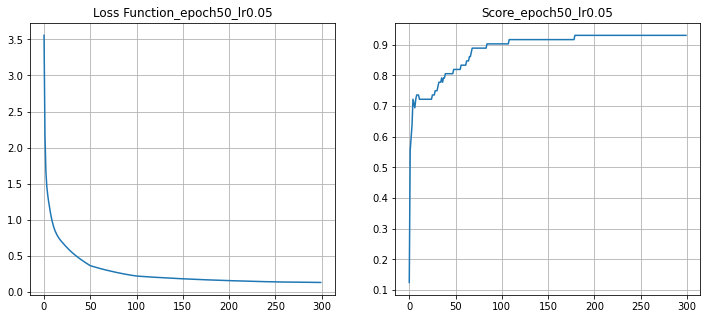

Epoch:  0 , Loss= 0.13422618025424485 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.1340901200504903 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.13395276399301614 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.13381308500524297 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.13367969795730686 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.13354251042594847 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.1334096387328563 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.13327900594928932 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.13314281206926298 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.1330058775164926 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.13287218747974172 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.13273940462766076 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.1326074270114306 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.13248009593145454 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.13234508261153533 , Score= 0.9444444444444444
Epoch:  1

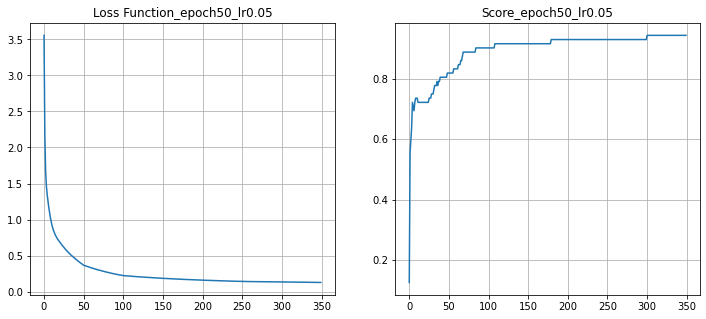

Epoch:  0 , Loss= 0.12780328436722066 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.12768449490682976 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.1275625628238022 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.12744324307280316 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.12732781685847447 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.12720992732444453 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.12708634559179927 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.12696714868361977 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.12684781819110605 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.12673529816099033 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.12661731805010992 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.12649569725591506 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.12637835414117135 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.12625977242490635 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.12614988542727257 , Score= 0.9444444444444444
Epoch:

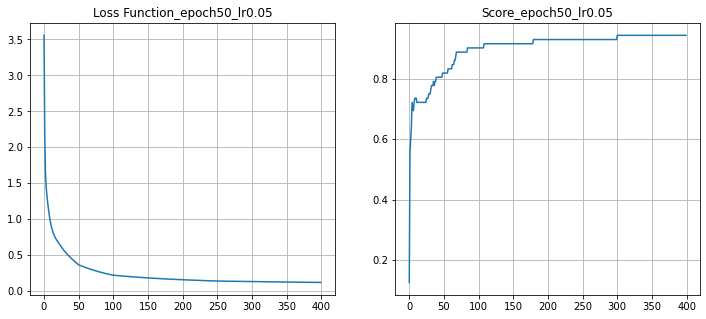

Epoch:  0 , Loss= 0.12211800819700266 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.12201443626883414 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.12190843713739255 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.12179697590282838 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.12169245334716408 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.12158863245566136 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.12147831997130741 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.12137301559009873 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.12126761188315272 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.12116134862238763 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.12105480585012486 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.12095706024024029 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.12084964539629425 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.12074246903292526 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.1206370461421508 , Score= 0.9444444444444444
Epoch:

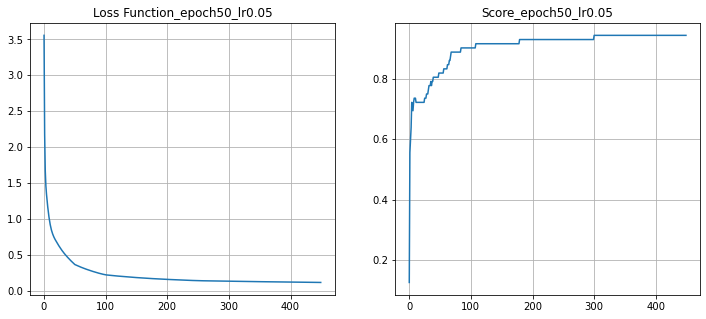

Epoch:  0 , Loss= 0.11702778322262102 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.11693427681366761 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.11683959060617027 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.11674531743192565 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.11664473165144743 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.11654927789013696 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.11645270920963914 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.11636404391946087 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.11626540846852429 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.11616981069502931 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.11607360328350937 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.11597835901117055 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.11588449339204054 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.11579717132026449 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.11569923406601987 , Score= 0.9444444444444444
Epoch

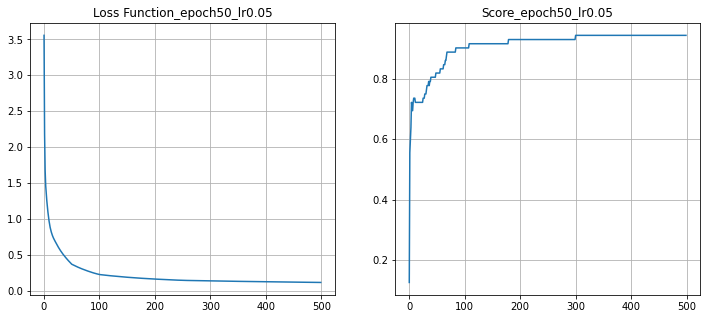

Epoch:  0 , Loss= 0.11243593706485853 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.11234655484161019 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.11225987719852819 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.11217150233204913 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.11209608114030566 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.11199890059146768 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.11191283937565634 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.11183183652290972 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.11174071284061111 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.1116555412598212 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.11156847981618914 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.11148523100750855 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.11139800406789331 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.11131309342075235 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.1112257505648207 , Score= 0.9444444444444444
Epoch: 

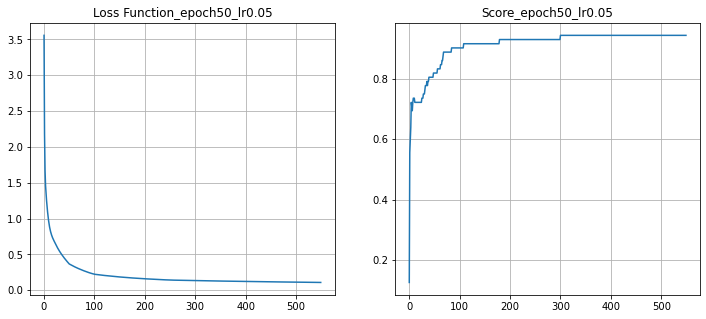

Epoch:  0 , Loss= 0.10825242286416707 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10817107440294461 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10809301267511287 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10801680381476321 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.1079332173677408 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.1078536676966192 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10777634855389683 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10769696271475089 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10761624619338264 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10753931745064285 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10746027039802415 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10738199601413634 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10730242324603383 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10722382677412576 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10714512305429133 , Score= 0.9444444444444444
Epoch: 

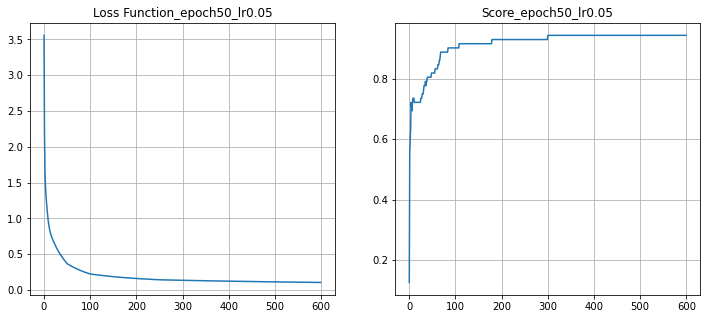

Epoch:  0 , Loss= 0.10442025422806132 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10434624024485467 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10427248885311913 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.104199222994758 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10413001311046056 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10405286990825566 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10398283667074136 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.1039095451419854 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10383688824874025 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10376339436774647 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10369028318322304 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10361827366566222 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10354828866742183 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10347482325858426 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10340311008689688 , Score= 0.9444444444444444
Epoch:  

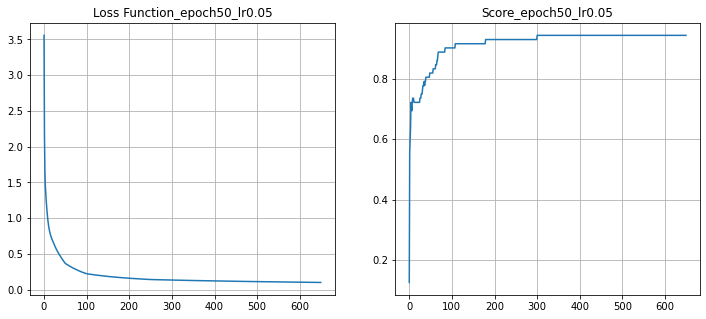

Epoch:  0 , Loss= 0.10089811543966488 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10089672808303293 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10089534076711103 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.1008939534918941 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10089256625737698 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.1008911790635545 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10088979191042168 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10088840479797323 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10088701772620413 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10088563069510927 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10088424370468353 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10088285675492178 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10088146984581897 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10088008297737 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10087869614956976 , Score= 0.9444444444444444
Epoch:  15

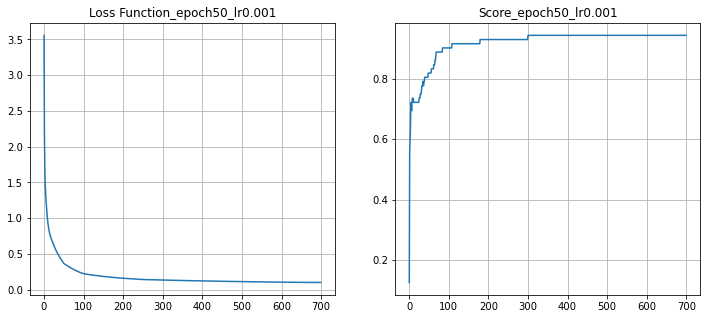

Epoch:  0 , Loss= 0.10082913296447774 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.1008277565531613 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10082641027745978 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10082502501814704 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10082368331181263 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10082230256978608 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10082094623960694 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.1008195802794893 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10081820932614324 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10081685814721808 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.1008154731661236 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10081413691640868 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10081275127230689 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10081140039976627 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10081002953641822 , Score= 0.9444444444444444
Epoch:  

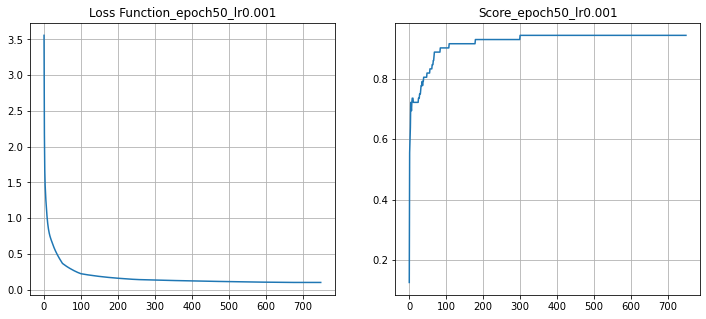

Epoch:  0 , Loss= 0.10076096669267642 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10075958606852815 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10075823326233106 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10075686741203244 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10075549998981391 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10075414891267936 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10075276687508582 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10075143057043132 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10075004749019571 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10074870014785306 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10074732938503711 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10074596742758338 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10074461143688869 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10074323486496582 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10074189364571297 , Score= 0.9444444444444444
Epoch

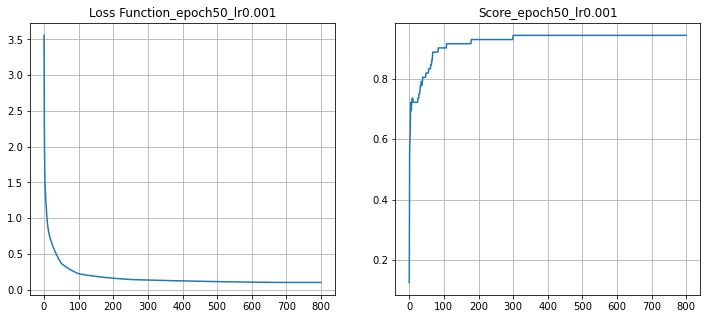

Epoch:  0 , Loss= 0.10069335519645774 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10069200421793142 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10069062566387246 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10068934356650687 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10068798850783357 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10068664461457842 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10068527398283064 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10068392341242399 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10068263996473538 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10068126682668814 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.1006799257478326 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10067854474425794 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10067724959559901 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10067591114092075 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10067455803260683 , Score= 0.9444444444444444
Epoch:

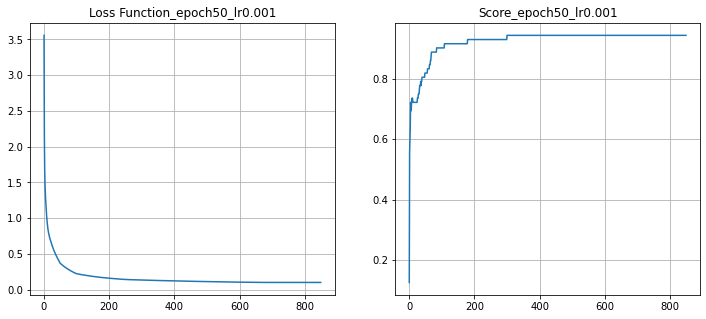

Epoch:  0 , Loss= 0.10062625460922434 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10062491373632114 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10062354363790212 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10062222972146721 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10062091344679393 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.1006195433049482 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10061820278249411 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10061682357024332 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10061556636249655 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10061419379247416 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10061284362156332 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10061148351453483 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10061015216200886 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10060885407157412 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.1006074751307455 , Score= 0.9444444444444444
Epoch: 

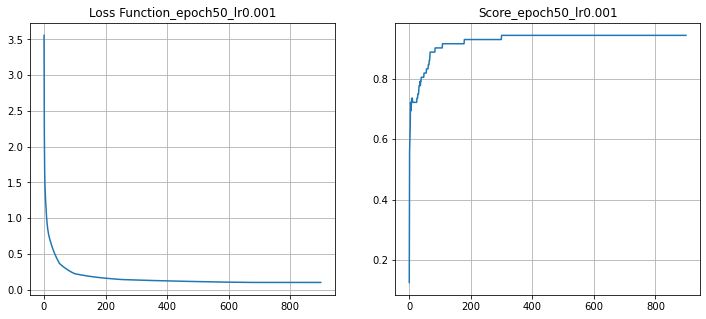

Epoch:  0 , Loss= 0.10055927132631717 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10055790372146128 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10055656420246506 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10055523059159859 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10055393465789148 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10055256080937594 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10055121311499114 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10054985408504152 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10054857268218319 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10054722843807727 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10054585144441285 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10054452200503157 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10054318328665829 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10054188346559675 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10054051970564457 , Score= 0.9444444444444444
Epoch

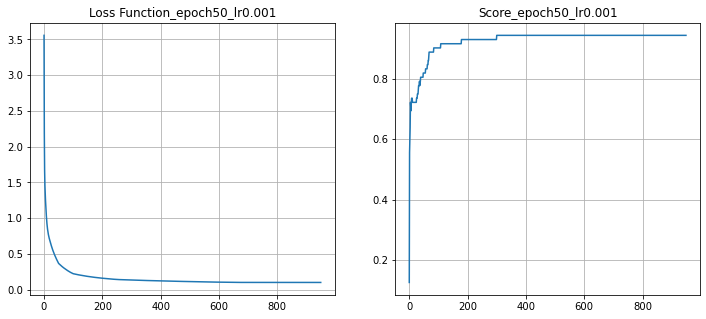

Epoch:  0 , Loss= 0.10049238424142137 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.1004910119007906 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10048966621292305 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10048836948177456 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10048702956575058 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10048568685480941 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10048431184126917 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10048300211197915 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.1004816899012308 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10048034938829527 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10047898722291866 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10047763204560212 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10047634268127624 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10047499613867232 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10047366360765543 , Score= 0.9444444444444444
Epoch: 

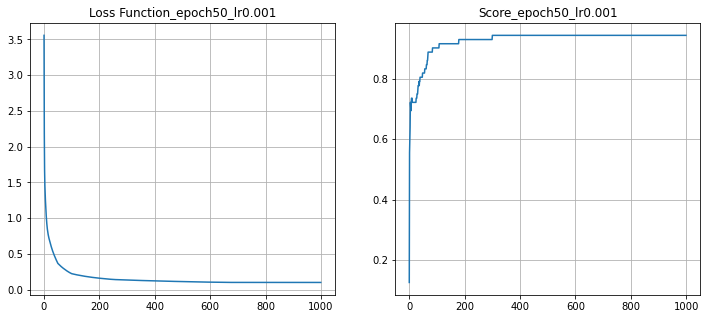

Epoch:  0 , Loss= 0.10042556973476835 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10042422903642077 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10042286548466185 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10042161116898468 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10042023763925333 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10041889856440553 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10041753847410836 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10041623584627668 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10041492101544956 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10041355258183693 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10041222215376319 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10041085866687784 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10040959648739611 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10040823184318196 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10040688317233425 , Score= 0.9444444444444444
Epoch

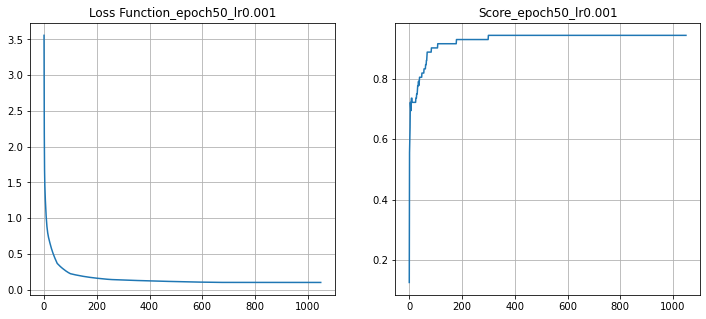

Epoch:  0 , Loss= 0.10035886883756978 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10035753070406102 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10035622941387605 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10035490217210716 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10035355948439939 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10035219196325625 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10035088007164465 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10034957448062966 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10034824135267705 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10034687934610735 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.10034553152272789 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10034424306172358 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10034290372536414 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10034157141313765 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.1003402001862963 , Score= 0.9444444444444444
Epoch:

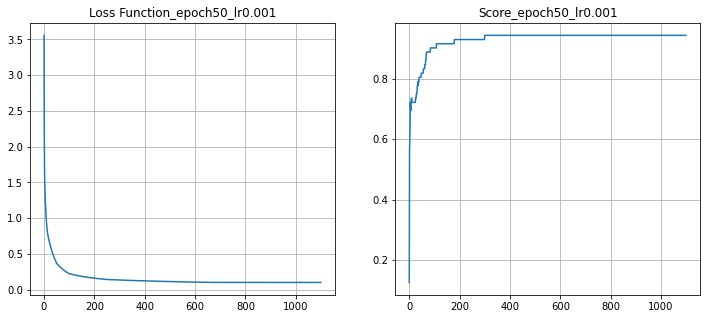

Epoch:  0 , Loss= 0.10029228110463202 , Score= 0.9444444444444444
Epoch:  1 , Loss= 0.10029094804129617 , Score= 0.9444444444444444
Epoch:  2 , Loss= 0.10028967135312619 , Score= 0.9444444444444444
Epoch:  3 , Loss= 0.10028830161667772 , Score= 0.9444444444444444
Epoch:  4 , Loss= 0.10028696883701219 , Score= 0.9444444444444444
Epoch:  5 , Loss= 0.10028560996958372 , Score= 0.9444444444444444
Epoch:  6 , Loss= 0.10028434061139276 , Score= 0.9444444444444444
Epoch:  7 , Loss= 0.10028300062385333 , Score= 0.9444444444444444
Epoch:  8 , Loss= 0.10028163842126998 , Score= 0.9444444444444444
Epoch:  9 , Loss= 0.10028030927795382 , Score= 0.9444444444444444
Epoch:  10 , Loss= 0.1002789789185223 , Score= 0.9444444444444444
Epoch:  11 , Loss= 0.10027769412106818 , Score= 0.9444444444444444
Epoch:  12 , Loss= 0.10027633086866096 , Score= 0.9444444444444444
Epoch:  13 , Loss= 0.10027498828792493 , Score= 0.9444444444444444
Epoch:  14 , Loss= 0.10027364009429895 , Score= 0.9444444444444444
Epoch:

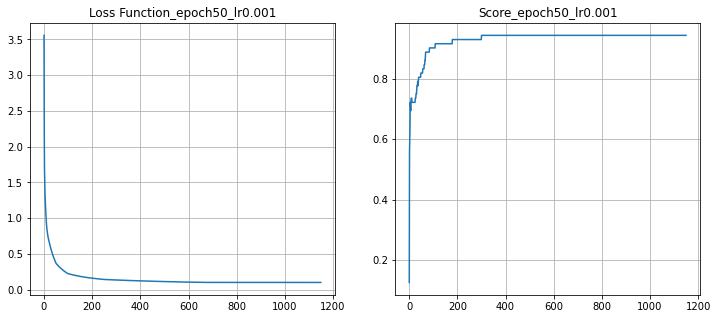

In [859]:
epochs = 50

lr_L = [.4, .2] + 3*[.1] + 8 * [.05] + 10 * [.001]
for i in lr_L:
    lr = i
    train(epochs, lr)
    
    print("max-score=", np.max(scoreL))
    print("avg-score=", np.average(scoreL))
    print("last-loss=", lossL[-1])

    # Saving Results
    params = {'epochs': epochs, 'lr': lr, 
             'max-score': np.max(scoreL), "avg-score=": np.average(scoreL), 
              "last-loss=":  lossL[-1]
             }
    newDirec = creatDirectory(f"./train-iris/", params)
    saveParams(newDirec, params)
    saveWeights(newDirec,weights, params)

    fig = plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(lossL)
    plt.grid(True)
    plt.title(f"Loss Function_epoch{epochs}_lr{lr}")
    # plt.show()
    # fig.savefig(newDirec+f'loss_epoch{epochs}_lr{lr}_{ datetime.datetime.now()}.jpg', bbox_inches='tight', dpi=150)

    # fig = plt.figure()
    plt.subplot(122)
    plt.plot(scoreL)
    plt.grid(True)
    plt.title(f"Score_epoch{epochs}_lr{lr}")
    plt.show()
    fig.savefig(newDirec+f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch{epochs}_lr{lr}.jpg", bbox_inches='tight', dpi=150)


